# Aula 1

## Importando base de dados

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('data/tips.csv')

In [3]:
dataset.sample(5)

,total_bill,tip,dessert,day,time,size
98,21.01,3.00,Yes,Fri,Dinner,2
66,16.45,2.47,No,Sat,Dinner,2
140,17.47,3.50,No,Thur,Lunch,2
195,7.56,1.44,No,Thur,Lunch,2
222,8.58,1.92,Yes,Fri,Lunch,1


## Tradução

In [4]:
dataset.rename(columns = {'total_bill': 'valor_da_conta', 'tip': 'gorjeta',
                         'dessert': 'sobremesa', 'day': 'dia_da_semana',
                         'time': 'hora_do_dia', 'size': 'total_de_pessoas'}, inplace = True)

In [5]:
dataset.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [6]:
dataset.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
dataset.sobremesa = dataset.sobremesa.map({'Yes': 'Sim', 'No': 'Não'})

In [8]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
48,28.55,2.05,Não,Sun,Dinner,3
215,12.90,1.10,Sim,Sat,Dinner,2
59,48.27,6.73,Não,Sat,Dinner,4
138,16.00,2.00,Sim,Thur,Lunch,2
44,30.40,5.60,Não,Sun,Dinner,4


In [9]:
dataset.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dataset.dia_da_semana = dataset.dia_da_semana.map({'Sun': 'Domingo', 
                                                  'Sat': 'Sabado', 'Thur': 'Quinta',
                                                  'Fri': 'Sexta'})

In [11]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
146,18.64,1.36,Não,Quinta,Lunch,3
63,18.29,3.76,Sim,Sabado,Dinner,4
227,20.45,3.00,Não,Sabado,Dinner,4
72,26.86,3.14,Sim,Sabado,Dinner,2
35,24.06,3.60,Não,Sabado,Dinner,3


In [12]:
dataset.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
dataset.hora_do_dia = dataset.hora_do_dia.map({'Dinner': 'Janta', 
                                                'Lunch': 'Almoco'})

In [14]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
171,15.81,3.16,Sim,Sabado,Janta,2
84,15.98,2.03,Não,Quinta,Almoco,2
191,19.81,4.19,Sim,Quinta,Almoco,2
138,16.00,2.00,Sim,Quinta,Almoco,2
162,16.21,2.00,Não,Domingo,Janta,3


# Aula 2

## Importando o Seaborn

In [15]:
import seaborn as sns

In [16]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: d:\anaconda3\lib\site-packages
Requires: matplotlib, numpy, scipy, pandas
Required-by: 


## Análise 1 - Valor da conta e gorjeta

In [17]:
dataset.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

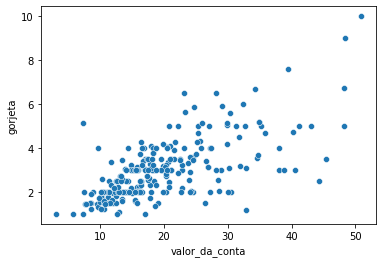

In [18]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = dataset)

#### Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [19]:
print('A base de dados contém: {} registros'.format(dataset.shape[0]))

A base de dados contém: 244 registros


In [20]:
print('Registros não nulos:')
dataset.count()

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o campo porcentagem

In [21]:
dataset['porcentagem'] = (dataset.gorjeta / dataset.valor_da_conta).round(2)

In [22]:
dataset.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


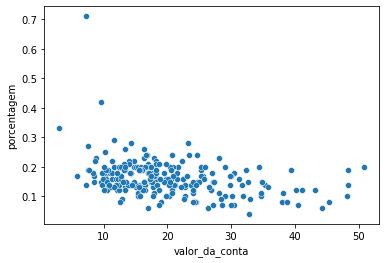

In [23]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = dataset)

#### Visualmente o valor da conta não é proporcional ao valor da gorjeta

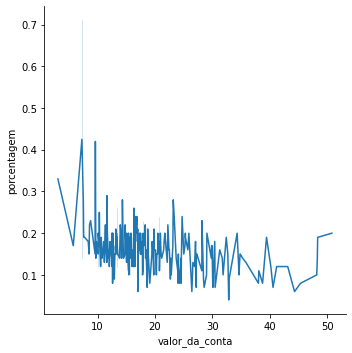

In [24]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = dataset)

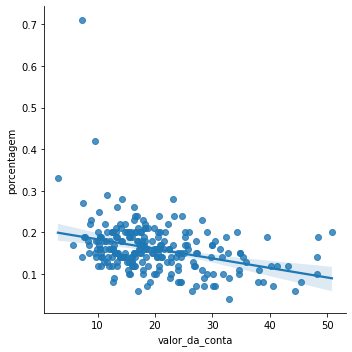

In [25]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = dataset)

# Aula 3

## Análise 2 - Sobremesa

In [26]:
dataset[dataset.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [27]:
dataset[dataset.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


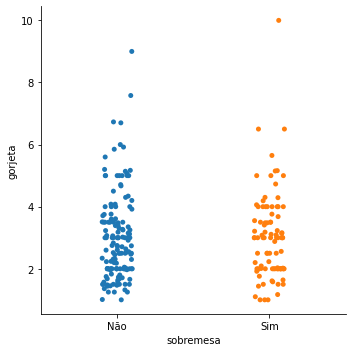

In [28]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = dataset)

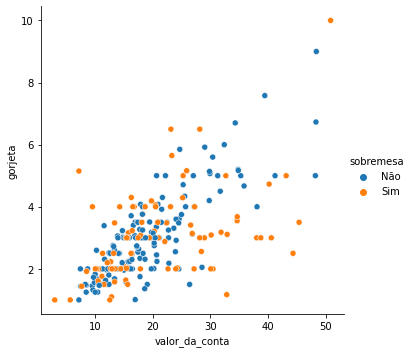

In [29]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = dataset)

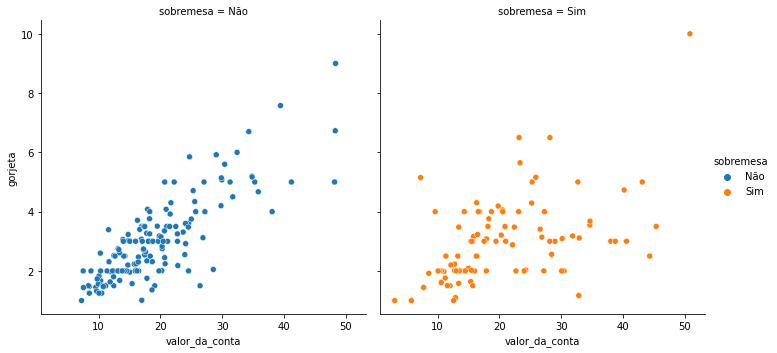

In [30]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = dataset)

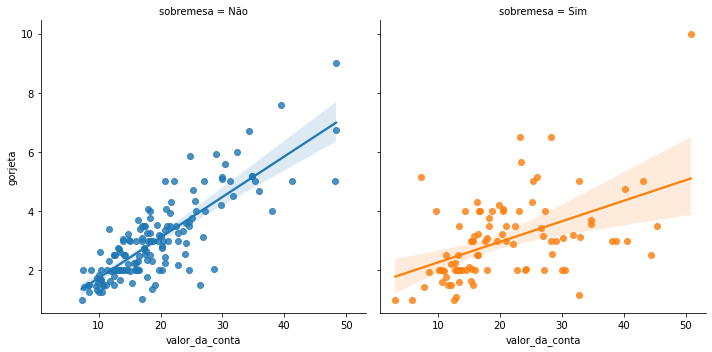

In [31]:
sns.lmplot(x='valor_da_conta', y='gorjeta',col='sobremesa',hue='sobremesa',data=dataset)

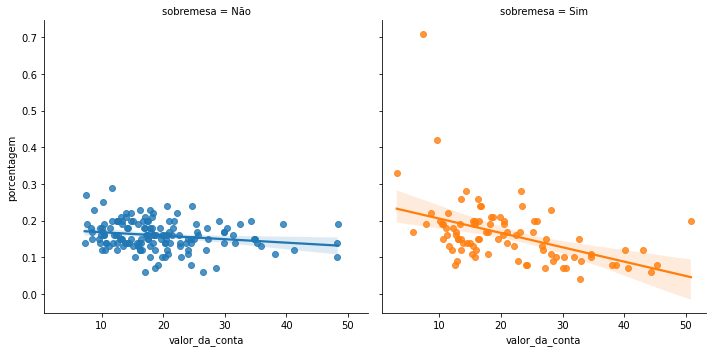

In [32]:
sns.lmplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa',data=dataset)

#### Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

### Teste de hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [33]:
from scipy.stats import ranksums

In [34]:
sobremesa = dataset.query('sobremesa == "Sim"').porcentagem

In [35]:
sem_sobremesa = dataset.query('sobremesa == "Não"').porcentagem

In [36]:
r = ranksums(sobremesa, sem_sobremesa)

In [37]:
print('O valor do p-value é {}'.format(r.pvalue))

# O p-value representa a probabilidade daquela amostra ter acontecido
# dentro da população. Se a chance é pequena, geralmente p-value < 0,05, 
# representa que um evento muito raro aconteceu, então optamos por descartar
# a hipótese nula, e dizer que ela pode não ser verdade.

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Aula 4

## Análise 3 - Dia da semana

In [38]:
dataset.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

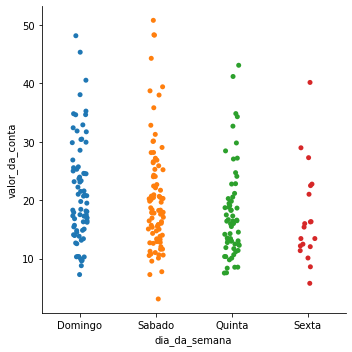

In [39]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = dataset)

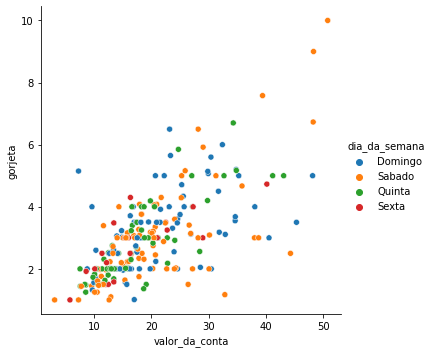

In [40]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia_da_semana',data=dataset)

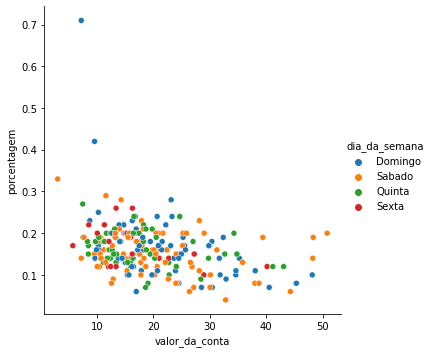

In [41]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana',data=dataset)

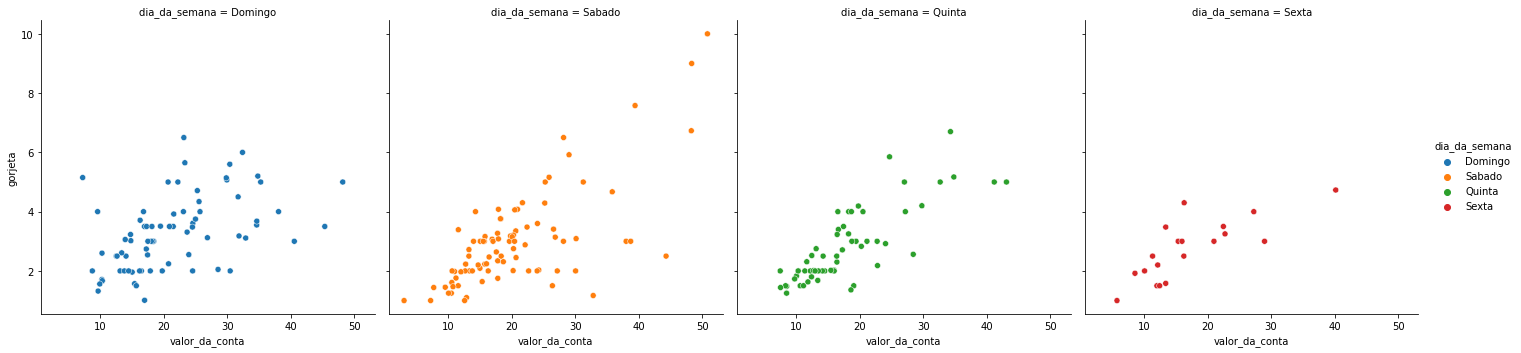

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia_da_semana',col='dia_da_semana', data=dataset)

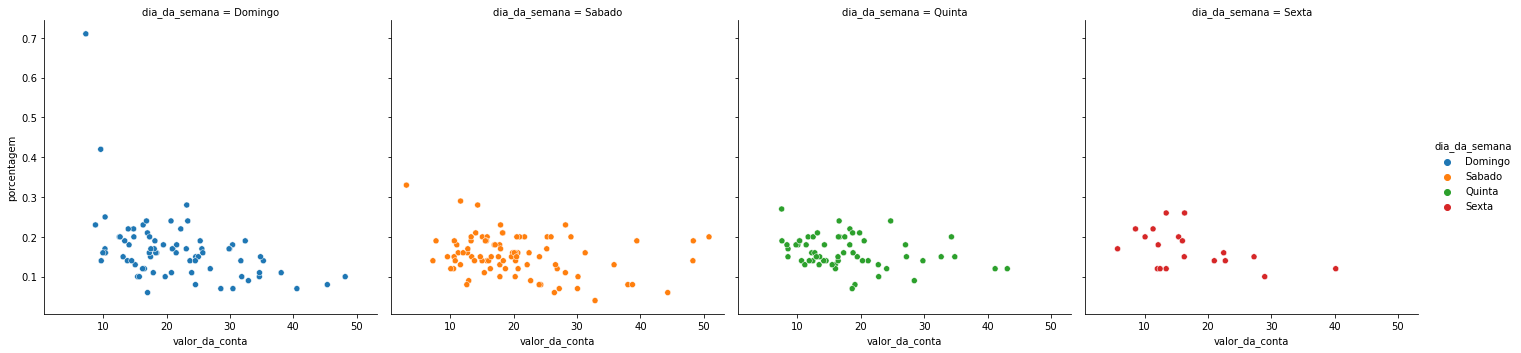

In [43]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana',col='dia_da_semana', data=dataset)

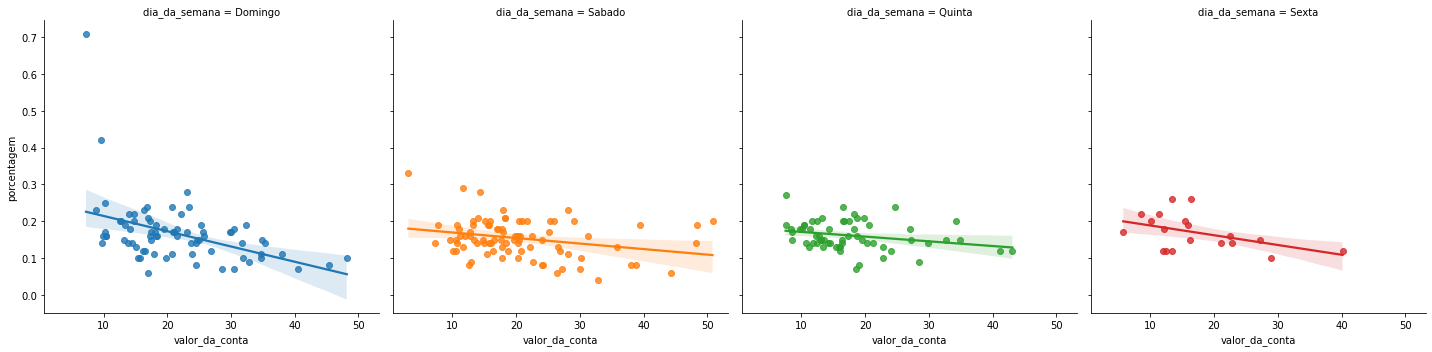

In [44]:
sns.lmplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana',col='dia_da_semana', data=dataset)

In [45]:
media_geral_gorjetas = dataset.gorjeta.mean()

In [46]:
print('A media geral das gorjetas é de {}'.format(media_geral_gorjetas))

A media geral das gorjetas é de 2.9982786885245902


In [47]:
dataset.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [48]:
print('Frequência dos dias')
dataset.dia_da_semana.value_counts()

Frequência dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sabado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sabado e no domingo**

In [49]:
valor_conta_domingo = dataset.query("dia_da_semana == 'Domingo'").valor_da_conta

In [50]:
valor_conta_sabado = dataset.query("dia_da_semana == 'Sabado'").valor_da_conta

In [51]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sabado e no domingo**

In [52]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


# Aula 5

## Análise 4 - Hora do dia

In [53]:
dataset.hora_do_dia.unique()

array(['Janta', 'Almoco'], dtype=object)

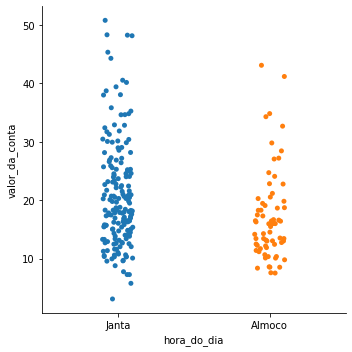

In [54]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = dataset)

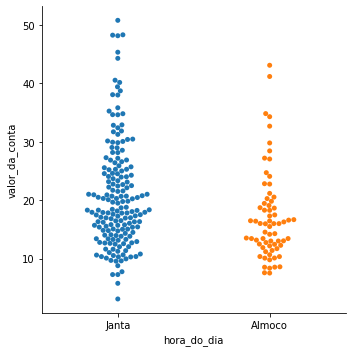

In [55]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta',kind = 'swarm', data = dataset)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

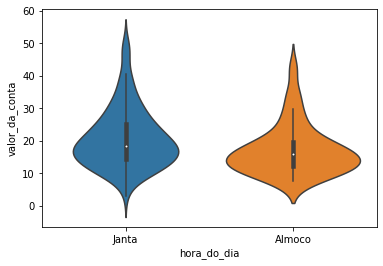

In [56]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=dataset)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

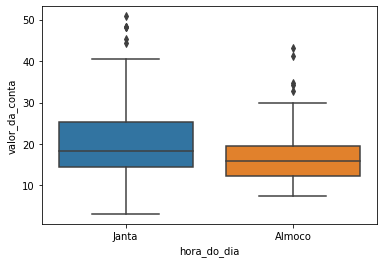

In [57]:
sns.boxplot(x='hora_do_dia', y = 'valor_da_conta', data= dataset)

In [58]:
almoco = dataset.query("hora_do_dia == 'Almoco'").valor_da_conta

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


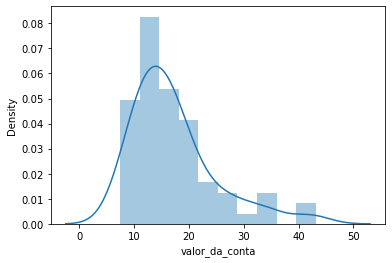

In [59]:
sns.distplot(almoco)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

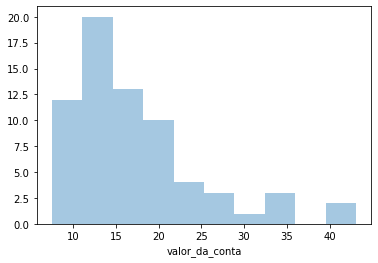

In [60]:
sns.distplot(almoco, kde = False)

In [61]:
jantar = dataset.query("hora_do_dia == 'Janta'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

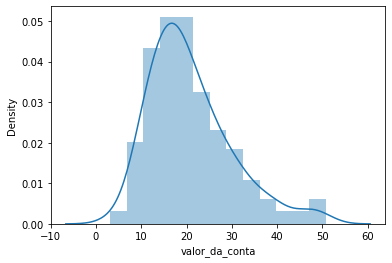

In [62]:
sns.distplot(jantar)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

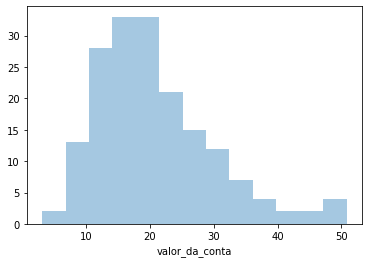

In [63]:
sns.distplot(jantar, kde = False)

In [64]:
dataset.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoco,17.168676,2.728088,0.163971
Janta,20.797159,3.102670,0.159773


### Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [65]:
r3 = ranksums(jantar,almoco)

In [66]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

### Teste de hipótese 2

**H<sup>null</sup>**

>**A distribuição do taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do taxa da gorjeta não é igual no jantar e no almoço**

In [67]:
porcentagem_almoco = dataset.query("hora_do_dia == 'Almoco'").porcentagem

In [68]:
porcentagem_jantar = dataset.query("hora_do_dia == 'Janta'").porcentagem

In [69]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [70]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**

>**A distribuição do taxa da gorjeta é igual no jantar e no almoço**